In [1]:
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
points_n = 200
clusters_n = 3
iteration_n = 20
points = tf.constant(np.random.uniform(0, 10, (points_n, 2)))
print(points.shape)
centroids = tf.constant(tf.slice(tf.compat.v1.random_shuffle(points), [0, 0], [clusters_n, -1]))
print(centroids.shape)

points_expanded = tf.expand_dims(points, 0)
print("points expanded shape {}".format(points_expanded.shape))

(200, 2)
(3, 2)
points expanded shape (1, 200, 2)


In [3]:
#@tf.function
def update_centroids(points_expanded, centroids):
    centroids_expanded = tf.expand_dims(centroids, 1)
    print("points expanded shape {}".format(points_expanded.shape))
    print("centroids expanded shape {}".format(centroids_expanded.shape))

    distances = tf.reduce_sum(tf.square(tf.subtract(points_expanded, centroids_expanded)), 2)
    print(distances.shape)
    assignments = tf.argmin(distances, 0)
    print(assignments.shape)
    print(assignments.numpy())
    means = []
    for c in range(clusters_n):
        print(tf.where(tf.equal(assignments, c)).shape)
        ruc = tf.reshape(tf.where(tf.equal(assignments, c)), [1,-1])
        print(ruc.shape)
        ruc = tf.gather(points, ruc)
        print(ruc.shape)
        ruc = tf.reduce_mean(ruc, axis=[1])
        print(ruc.shape)
        means.append(ruc)
        new_centroids = tf.concat(means, 0)
        
    return new_centroids, assignments

points expanded shape (1, 200, 2)
centroids expanded shape (3, 1, 2)
(3, 200)
(200,)
[2 1 2 2 0 0 2 2 0 2 1 2 2 1 2 0 0 0 2 2 0 0 1 1 2 0 0 2 0 0 2 1 0 0 2 0 2
 0 2 2 2 0 2 2 0 2 0 1 2 0 0 1 0 0 2 0 0 1 0 2 0 1 0 2 0 2 0 0 1 2 0 1 1 0
 0 0 0 1 0 0 0 0 0 1 2 1 1 0 0 2 1 1 1 0 2 0 1 0 0 0 0 0 2 2 2 0 1 1 0 0 2
 2 0 1 1 0 1 2 0 1 0 2 2 2 1 0 1 2 0 2 1 2 0 0 2 2 1 1 0 0 0 1 2 1 1 2 2 2
 2 2 2 0 0 0 1 0 1 0 2 1 1 0 2 2 2 2 0 1 1 2 0 0 0 0 0 0 2 0 2 2 2 2 0 0 0
 0 0 1 2 0 1 2 0 2 1 0 2 0 0 2]
(88, 1)
(1, 88)
(1, 88, 2)
(1, 2)
(44, 1)
(1, 44)
(1, 44, 2)
(1, 2)
(68, 1)
(1, 68)
(1, 68, 2)
(1, 2)
points expanded shape (1, 200, 2)
centroids expanded shape (3, 1, 2)
(3, 200)
(200,)
[1 1 1 2 0 0 1 2 0 2 1 2 1 1 1 0 0 0 1 1 0 0 1 1 2 0 0 2 0 0 2 1 0 0 2 0 2
 2 2 2 2 0 2 2 0 2 0 1 2 0 0 1 0 0 2 0 0 1 0 2 0 1 0 2 0 2 0 0 1 2 0 1 1 0
 1 0 0 1 0 0 0 0 0 1 2 1 1 0 0 2 1 1 1 0 2 0 1 0 1 0 0 0 2 1 2 0 1 1 1 0 2
 2 0 2 1 0 1 2 0 1 0 1 2 2 1 0 1 2 1 2 1 1 0 0 2 2 1 1 1 2 0 1 2 1 1 2 2 2
 2 2 2 0 0 0 1 0 1 0 

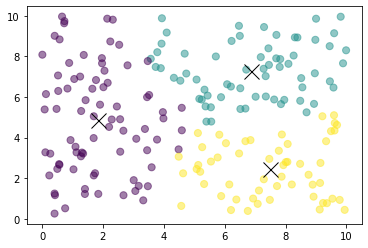

In [4]:
for _ in range(iteration_n):
    centroids, assignments = update_centroids(points_expanded, centroids)


plt.scatter(points[:, 0], points[:, 1], c=assignments, s=50, alpha=0.5)
plt.plot(centroids[:, 0], centroids[:, 1], 'kx', markersize=15)
plt.show()

In [5]:
import cv2

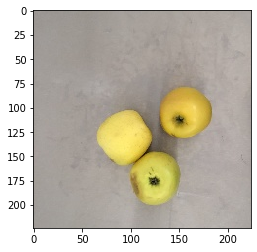

In [6]:
image = cv2.imread("test_images/apple_01.JPG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [12]:
image_tensor = tf.convert_to_tensor(image)
print(image_tensor.shape)
image_tensor = tf.reshape(image_tensor, [50176, 3])
print(image_tensor.shape)

clusters_n = 3
iteration_n = 20
centroids = tf.constant(tf.slice(tf.compat.v1.random_shuffle(image_tensor), [0, 0], [clusters_n, -1]))
print(centroids.shape)

image_expanded = tf.expand_dims(image_tensor, 0)
print("points expanded shape {}".format(image_tensor.shape))

image_tensor = tf.cast(image_tensor, tf.float32)
image_expanded = tf.cast(image_expanded, tf.float32)
centroids = tf.cast(centroids, tf.float32)

(224, 224, 3)
(50176, 3)
(3, 3)
points expanded shape (50176, 3)


In [13]:
#@tf.function
def update_centroids(points_expanded, centroids):
    centroids_expanded = tf.expand_dims(centroids, 1)

    distances = tf.reduce_sum(tf.square(tf.subtract(points_expanded, centroids_expanded)), 2)
    assignments = tf.argmin(distances, 0)

    means = []
    for c in range(clusters_n):
        ruc = tf.reshape(tf.where(tf.equal(assignments, c)), [1,-1])
        ruc = tf.gather(image_tensor, ruc)
        ruc = tf.reduce_mean(ruc, axis=[1])
        means.append(ruc)
        new_centroids = tf.concat(means, 0)
        
    return new_centroids, assignments

In [14]:
for _ in range(iteration_n):
    centroids, assignments = update_centroids(image_expanded, centroids)


In [15]:
centroids

<tf.Tensor: id=1918, shape=(3, 3), dtype=float32, numpy=
array([[220.7891  , 200.12285 ,  88.50556 ],
       [136.38708 , 120.73838 ,  75.059235],
       [168.38687 , 161.57509 , 155.97253 ]], dtype=float32)>

In [17]:
colors = centroids.numpy()
colors[0][0]

220.7891

In [18]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [21]:
hex_colors = [RGB2HEX(colors[i]) for i in len(colors)]


plt.figure(figsize = (8, 6))
plt.pie(3, colors = hex_colors)
plt.show()

TypeError: 'int' object is not iterable